(c) 2016 Enplus Advisors, Inc.

For more information on plotting with statsmodels:
http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/example_regression_plots.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
dat = pd.read_csv('starmine.csv', low_memory=False)

**Exercise:**

Regress the Starmine indicator on 1-month returns. 
Get a summary of the model.

* What are the coefficient estimates?
* What is the R-squared?

In [3]:
m1 = smf.ols('ret_0_1_m ~ smi', data=dat).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ret_0_1_m   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     151.1
Date:                Tue, 17 May 2016   Prob (F-statistic):           1.30e-34
Time:                        19:52:39   Log-Likelihood:                 15597.
No. Observations:               19702   AIC:                        -3.119e+04
Df Residuals:                   19700   BIC:                        -3.117e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0073      0.002      4.554      0.000         0.004     0.010
smi            0.0003   2.75e-05     12.294      0.000         0.000     0.000
==============================================================================
Omnibus:                     3354.662   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32693.833
Skew:                           0.529   Prob(JB):                         0.00
Kurtosis:                       9.222   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Exercise:** 

Examine the model results graphically.
* Create a residual plot

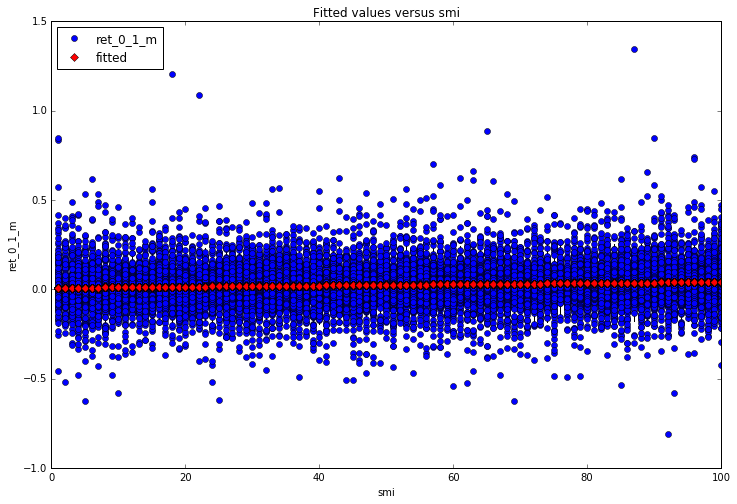

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(m1, "smi", ax=ax)

**Exercise**

* Are there any problems with the plot? How might we resolve them?
* How do we remove the intercept?

In [5]:
m2 = smf.ols('ret_0_1_m ~ smi - 1', data=dat).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ret_0_1_m   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1122.
Date:                Tue, 17 May 2016   Prob (F-statistic):          3.13e-239
Time:                        19:52:40   Log-Likelihood:                 15586.
No. Observations:               19702   AIC:                        -3.117e+04
Df Residuals:                   19701   BIC:                        -3.116e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
smi            0.0004   1.33e-05     33.492      0.000         0.000     0.000
==============================================================================
Omnibus:                     3351.036   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32561.085
Skew:                           0.529   Prob(JB):                         0.00
Kurtosis:                       9.209   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Exercise**

How would we run a Fama-French style regression?

In [6]:
dat['pb'] = dat['cap_usd'] / dat['common_equity']
m3 = smf.ols('ret_0_1_m ~ smi + np.log(cap_usd) + np.log(pb)', data=dat).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ret_0_1_m   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     49.73
Date:                Tue, 17 May 2016   Prob (F-statistic):           5.21e-32
Time:                        19:52:40   Log-Likelihood:                 15305.
No. Observations:               19237   AIC:                        -3.060e+04
Df Residuals:                   19233   BIC:                        -3.057e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           0.0208      0.012      1.727      0.084        -0.003     0.044
smi                 0.0003   2.87e-05     11.329      0.000         0.000     0.000
np.log(cap_usd)    -0.0007      0.001     -1.214      0.225        -0.002     0.000
np.log(pb)          0.0018      0.001      1.655      0.098        -0.000     0.004
==============================================================================
Omnibus:                     3249.117   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32631.960
Skew:                           0.511   Prob(JB):                         0.00
Kurtosis:                       9.298   Cond. No.                         939.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Exercise:** 

Manually run the regression using numpy optimize.